[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


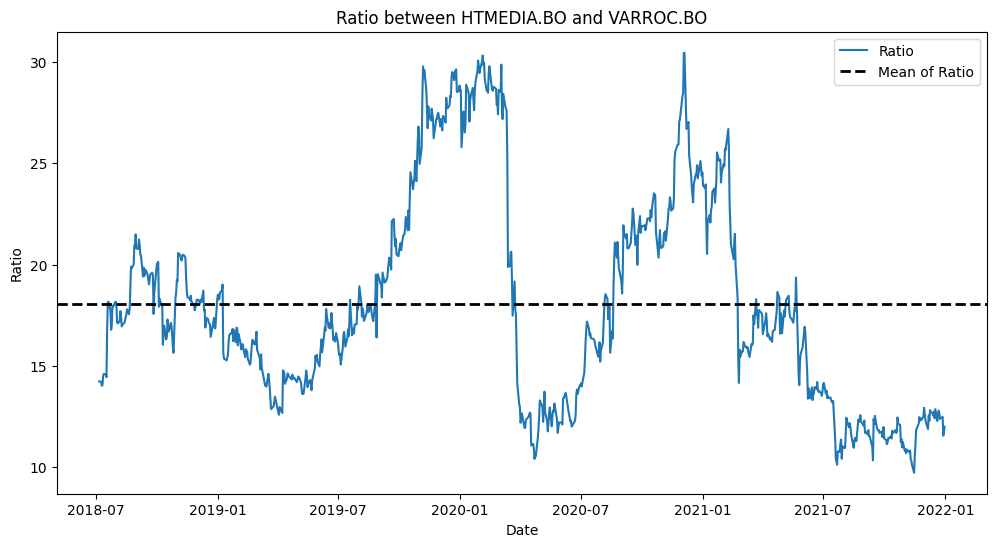

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression

def calculate_ratio(stock1, stock2, start, end):
    data1 = yf.download(stock1, start=start, end=end)['Adj Close']
    data2 = yf.download(stock2, start=start, end=end)['Adj Close']
    ratio = data2.dropna() / data1.dropna()
    return ratio

stock1 = "HTMEDIA.BO"  # Infosys Ltd
stock2 = "VARROC.BO"   # Tata Consultancy Services Ltd
start = "2018-01-01"
end = "2022-01-01"

ratio = calculate_ratio(stock1, stock2, start, end)

mean_ratio = np.mean(ratio)

plt.figure(figsize=(12, 6))
plt.plot(ratio, label='Ratio')
plt.axhline(mean_ratio, color='black', linestyle='--', linewidth=2, label='Mean of Ratio')
plt.title(f'Ratio between {stock1} and {stock2}')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.legend()
plt.show()


CALCULATING Z-SCORE TO NORMALISE THE RATIOS

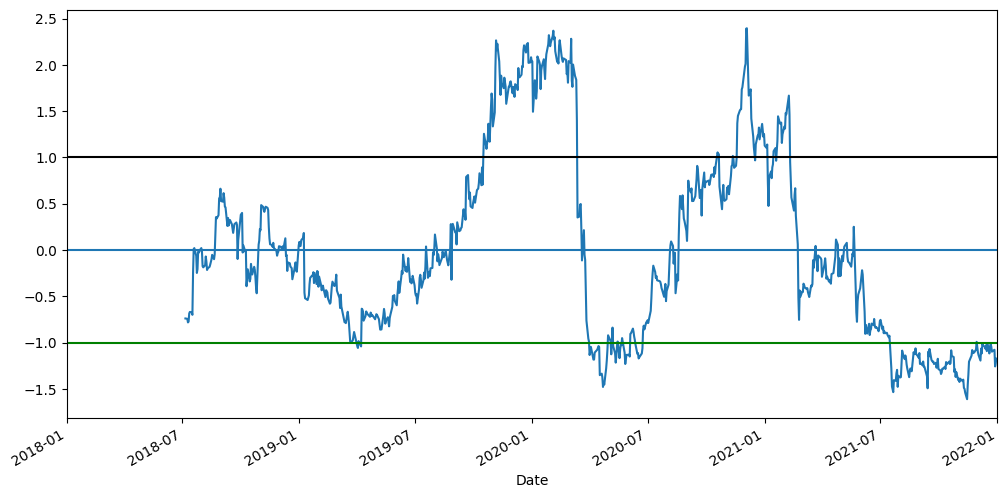

In [52]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio).plot(figsize=(12,6))
plt.axhline(zscore(ratio).mean())
plt.axhline(1.0, color='black')
plt.axhline(-1.0, color='green')
plt.xlim('2018-01-01', '2022-01-01')
plt.show()

CALCULATION Z-SCORE USING 5-DAY AND 60-DAY MOVING AVERAGES (MA)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


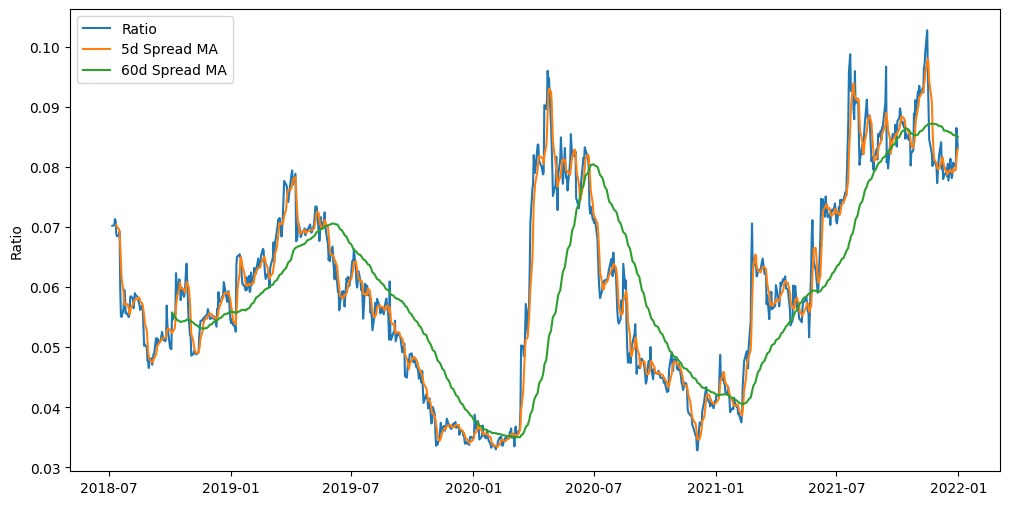

In [53]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

gicre_data = yf.download('HTMEDIA.BO', start='2018-01-01', end='2022-01-01')
zeelearn_data = yf.download('VARROC.BO', start='2018-01-01', end='2022-01-01')

gicre_prices = gicre_data['Adj Close']
zeelearn_prices = zeelearn_data['Adj Close']

ratio= (gicre_prices/zeelearn_prices)

spread_mavg5 = ratio.rolling(window=5, center=False).mean()
spread_mavg60 = ratio.rolling(window=60, center=False).mean()

std_60 = ratio.rolling(window=60, center=False).std()

zscore_60_5 = (spread_mavg5 - spread_mavg60) / std_60

plt.figure(figsize=(12, 6))
plt.plot(ratio.index, ratio.values)
plt.plot(spread_mavg5.index, spread_mavg5.values)
plt.plot(spread_mavg60.index, spread_mavg60.values)
plt.legend(['Ratio', '5d Spread MA', '60d Spread MA'])

plt.ylabel('Ratio')
plt.show()


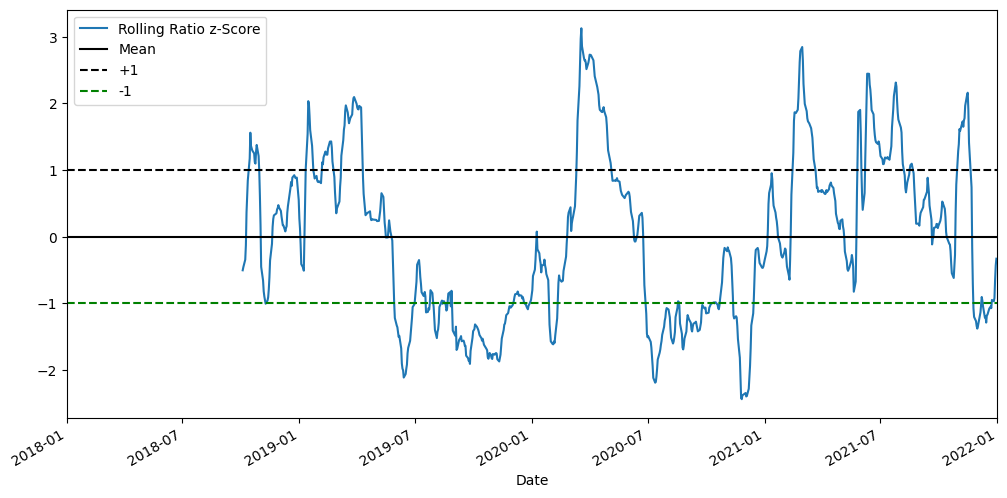

In [54]:

plt.figure(figsize=(12, 6))
zscore_60_5.plot()
plt.xlim('2018-01-01', '2022-01-01')
plt.axhline(0, color='black')
plt.axhline(1.0, color='black', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()


DEFINING BUY & SELL SIGNALS ON Z-SCORE VALUES

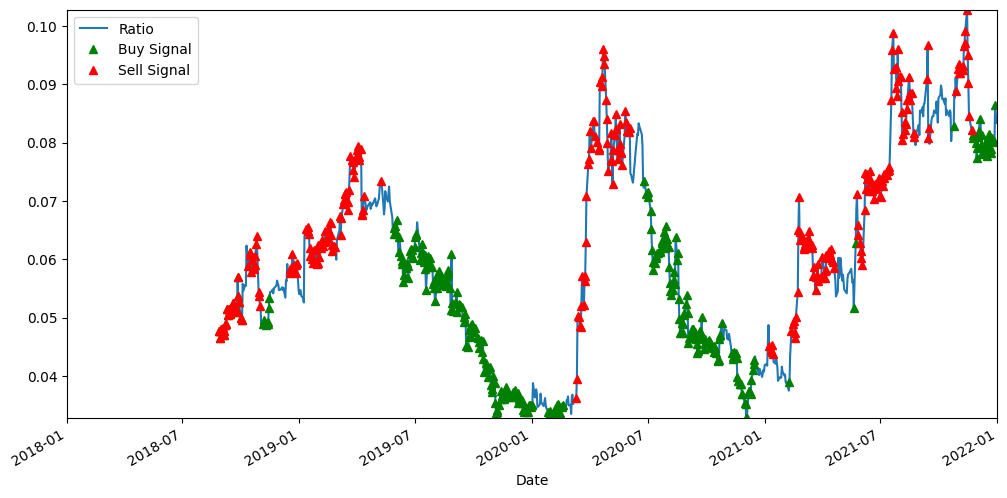

In [55]:

plt.figure(figsize=(12, 6))
ratio[160:].plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_60_5 > -0.6] = 0
sell[zscore_60_5 < 0.6] = 0
buy[160:].plot(color='g', linestyle='None', marker='^')
sell[160:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.xlim('2018-01-01', '2022-01-01')
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()


INDUVIDUAL STOCKS

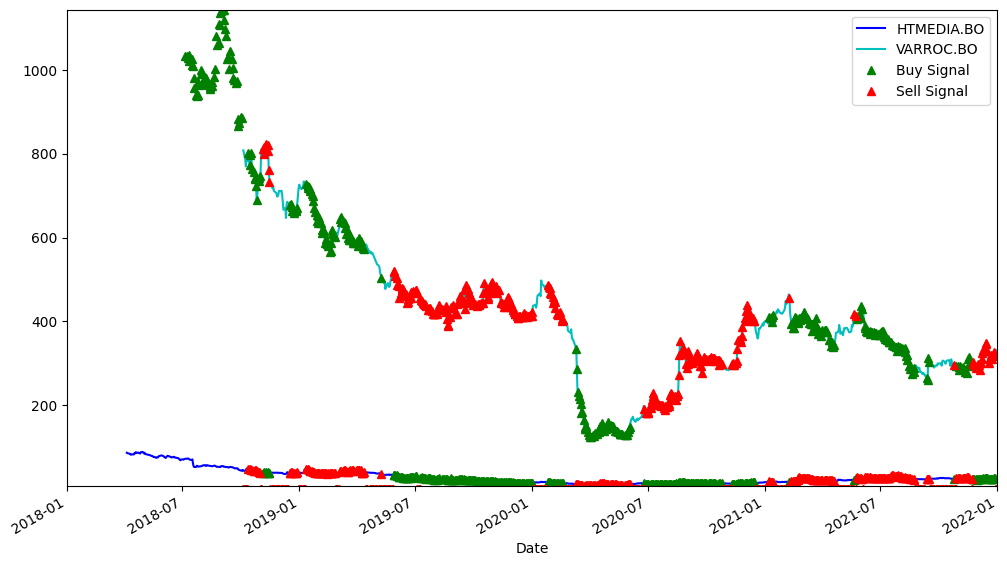

In [43]:

plt.figure(figsize=(12,7))

gicre_prices[60:].plot(color='b')
zeelearn_prices[60:].plot(color='c')

buyR = pd.Series(0, index=gicre_prices.index)
sellR = pd.Series(0, index=zeelearn_prices.index)

buyR[buy != 0] = gicre_prices[buy != 0]
sellR[buy != 0] = zeelearn_prices[buy != 0]

buyR[sell != 0] = zeelearn_prices[sell != 0]
sellR[sell != 0] = gicre_prices[sell != 0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')

x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(gicre_prices.min(), zeelearn_prices.min()), max(gicre_prices.max(), zeelearn_prices.max())))
plt.xlim('2018-01-01', '2022-01-01')

plt.legend(['HTMEDIA.BO', 'VARROC.BO', 'Buy Signal', 'Sell Signal'])
plt.show()


FINAL STRATEGY


[*********************100%%**********************]  4 of 4 completed


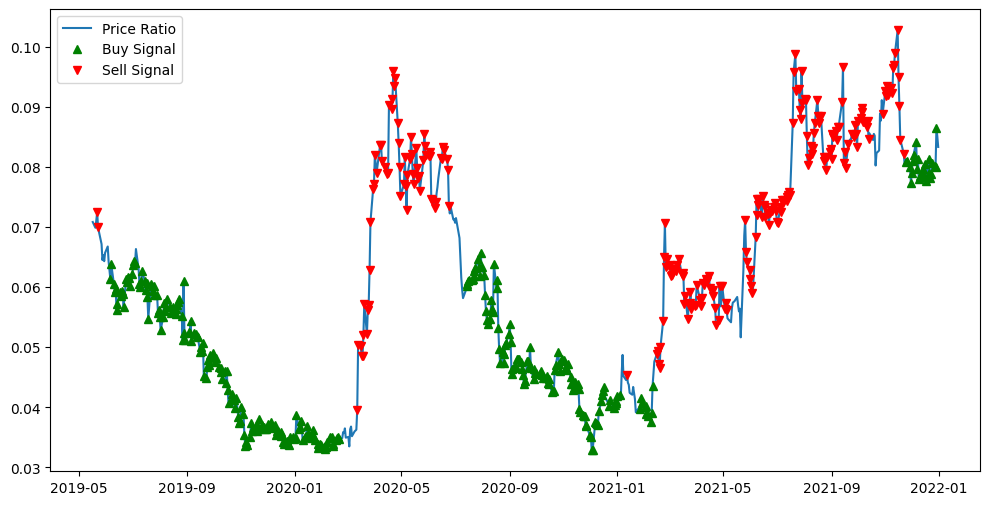

Profitability: Profit percentage: 74.80%
Volatility: 0.33
Sharpe Ratio: 0.33


In [56]:
def trade_strategy(start, end, window1, window2):
    import yfinance as yf
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    # Download data
    stocks = ['VARROC.BO', 'HTMEDIA.BO', '^BSESN', '^NSEI']
    data = yf.download(stocks, start=start, end=end)['Adj Close']

    varroc_prices = data['VARROC.BO'].dropna()
    htmedia_prices = data['HTMEDIA.BO'].dropna()
    sensex_prices = data['^BSESN'].dropna()
    nifty_prices = data['^NSEI'].dropna()

    # Calculate the ratio and z-score
    ratio = htmedia_prices / varroc_prices
    ratio_mavg1 = ratio.rolling(window=window1).mean()
    ratio_mavg2 = ratio.rolling(window=window2).mean()
    std_2 = ratio.rolling(window=window2).std()
    zscore = (ratio_mavg1 - ratio_mavg2) / std_2

    # Plot the ratio and signals
    plt.figure(figsize=(12, 6))
    plt.plot(ratio[window2:], label='Price Ratio')
    buy_signals = ratio.copy()
    sell_signals = ratio.copy()
    buy_signals[zscore > -0.6] = np.nan
    sell_signals[zscore < 0.6] = np.nan
    plt.plot(buy_signals[window2:], marker='^', linestyle='None', color='g', label='Buy Signal')
    plt.plot(sell_signals[window2:], marker='v', linestyle='None', color='r', label='Sell Signal')
    plt.legend()
    plt.show()

    # Trading logic
    money = 10000
    count_varroc = 0
    count_htmedia = 0
    returns = []

    for i in range(len(ratio)):
        if zscore[i] < -0.6 and money > varroc_prices.iloc[i]:
            money -= varroc_prices.iloc[i]
            count_varroc += 1
            money += htmedia_prices.iloc[i]
            count_htmedia -= 1
        elif zscore[i] > 0.6 and money > htmedia_prices.iloc[i]:
            money -= htmedia_prices.iloc[i]
            count_htmedia += 1
            money += varroc_prices.iloc[i]
            count_varroc -= 1
        elif abs(zscore[i]) < 0.25:
            money += count_varroc * varroc_prices.iloc[i] + count_htmedia * htmedia_prices.iloc[i]
            count_varroc = 0
            count_htmedia = 0
        portfolio_value = money + count_varroc * varroc_prices.iloc[i] + count_htmedia * htmedia_prices.iloc[i]
        returns.append((portfolio_value - 10000) / 10000)

    # Performance metrics
    profit_percentage = (portfolio_value - 10000) / 100
    volatility = np.std(returns)
    sharpe_ratio = np.mean(returns) / volatility if volatility != 0 else 0
    sensex_return = (sensex_prices.iloc[-1] - sensex_prices.iloc[0]) / sensex_prices.iloc[0]
    nifty_return = (nifty_prices.iloc[-1] - nifty_prices.iloc[0]) / nifty_prices.iloc[0]

    print(f"Profitability: Profit percentage: {profit_percentage:.2f}%")
    print(f"Volatility: {volatility:.2f}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


# Example usage
trade_strategy('2019-01-01', '2022-01-01', 5, 90)


**-> backTesting.ipynb**